## Day 22 Lecture 1 Assignment

In this assignment, we will do some EDA to uncover basic patterns in our datasets. We will be using both the FIFA ratings dataset and the Chicago traffic crash dataset.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


In [ ]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We will start with the FIFA dataset, which consists entirely of numeric features (we will ignore the player ID and name). Create a histogram of each numeric column in the dataset. What do you notice about the distributions of scores? Are there any particular distributions that jump out?

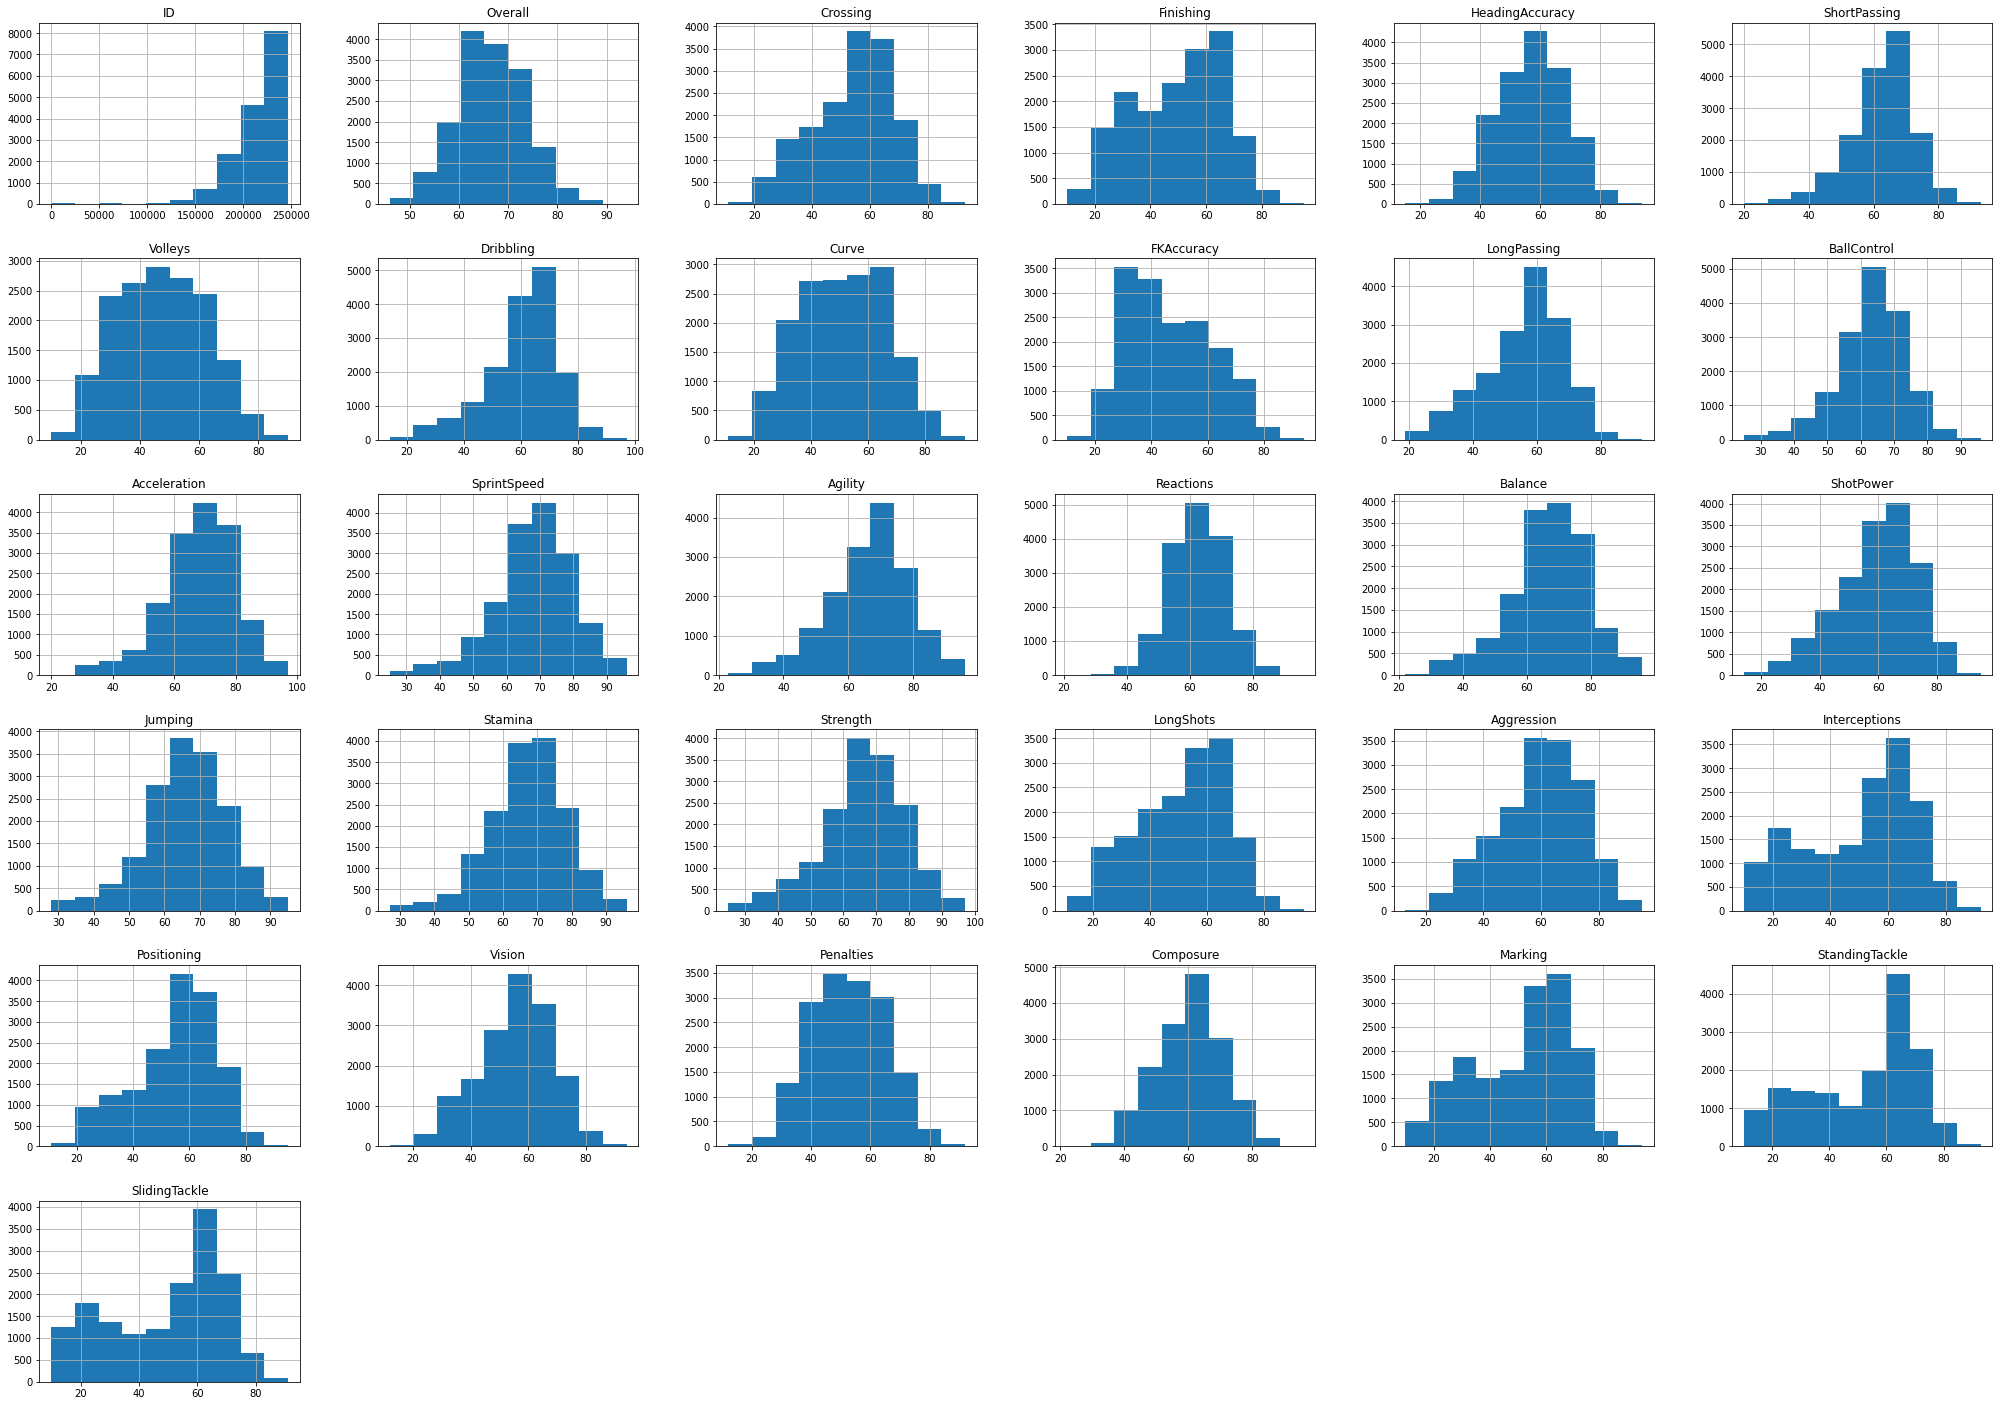

In [ ]:
# answer goes here
soccer_data.hist(figsize = (35, 25))
plt.show()




Next, generate pairplots between the Overall rating and the other numeric features (i.e. Overall-Crossing, Overall-Finishing....Overall-SlidingTackle). Are the results what you would expect, visually speaking? What are the strongest correlations that jump out?

This dataset has many columns, so it may help to split up the pairwise scatterplots across two or three visuals. In addition, the scatterplots will probably be too crowded to be informative if the full dataset is used, so using a sample of the rows is advisable as well.

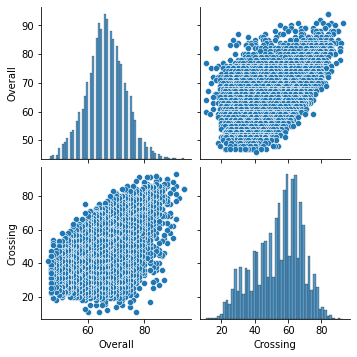

In [ ]:
import seaborn as sns

df = soccer_data[['Overall', 'Crossing']]
sns.pairplot(df)

Plot a correlation matrix between all of the numeric columns. A heatmap is an effective way to do so. Which pairs of features stand out as having exceptionally strong correlations, both positive and/or negative?

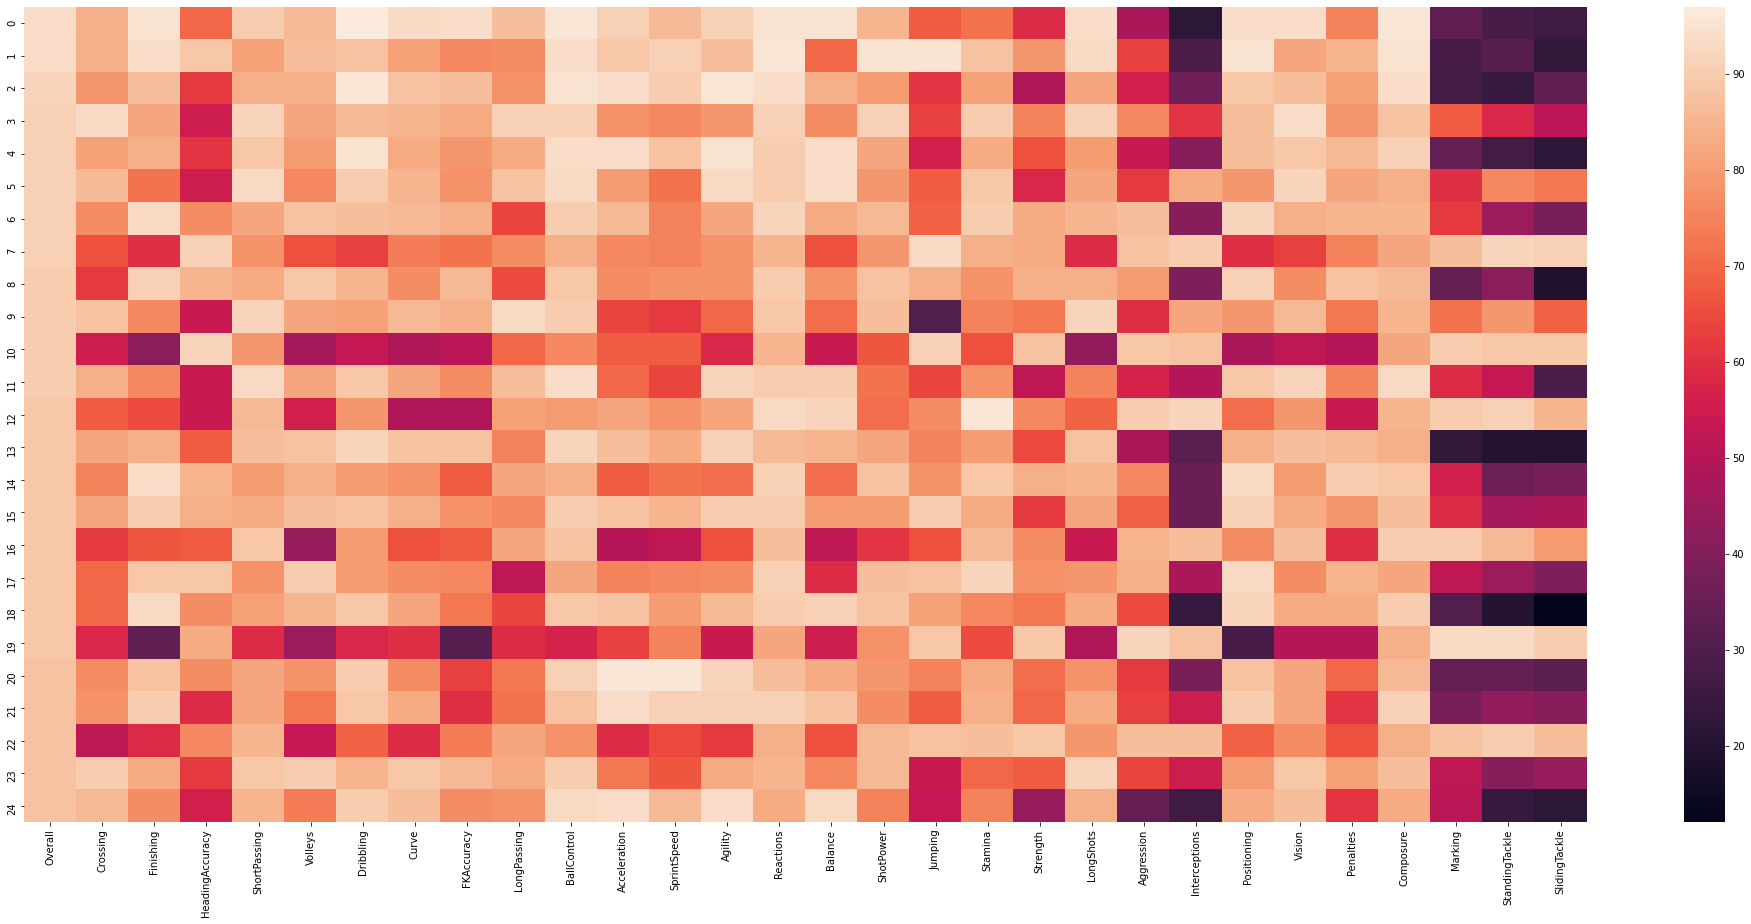

In [ ]:
# answer goes here
fig, ax = plt.subplots(figsize=(35,15))
ax = sns.heatmap(soccer_data[['Overall',	'Crossing',	'Finishing',	'HeadingAccuracy',	'ShortPassing',	'Volleys',	'Dribbling',
                              'Curve',	'FKAccuracy',	'LongPassing',	'BallControl',	'Acceleration',	'SprintSpeed',	'Agility',
                              'Reactions',	'Balance',	'ShotPower',	'Jumping',	'Stamina',	'Strength',	'LongShots',	'Aggression',
                              'Interceptions',	'Positioning',	'Vision',	'Penalties',	'Composure',	'Marking',	'StandingTackle',	'SlidingTackle']].head(25))




Finally, create a pairplot using the numeric features in the dataset (i.e. scatterplots between pairs of features, rather than between Overall and the other features). Are the graphs visually consistent with what you would expect from the correlation heatmap?

Note: there are too many numeric features to realistically generate a pairplot between all of them, so choose a subset. Choosing a fixed number of consecutive columns is fine (e.g. 10 through 20); you can also use the results of the correlation heatmap to guide your choices of columns. As with the previous exercise, using a sample of rows is recommended.

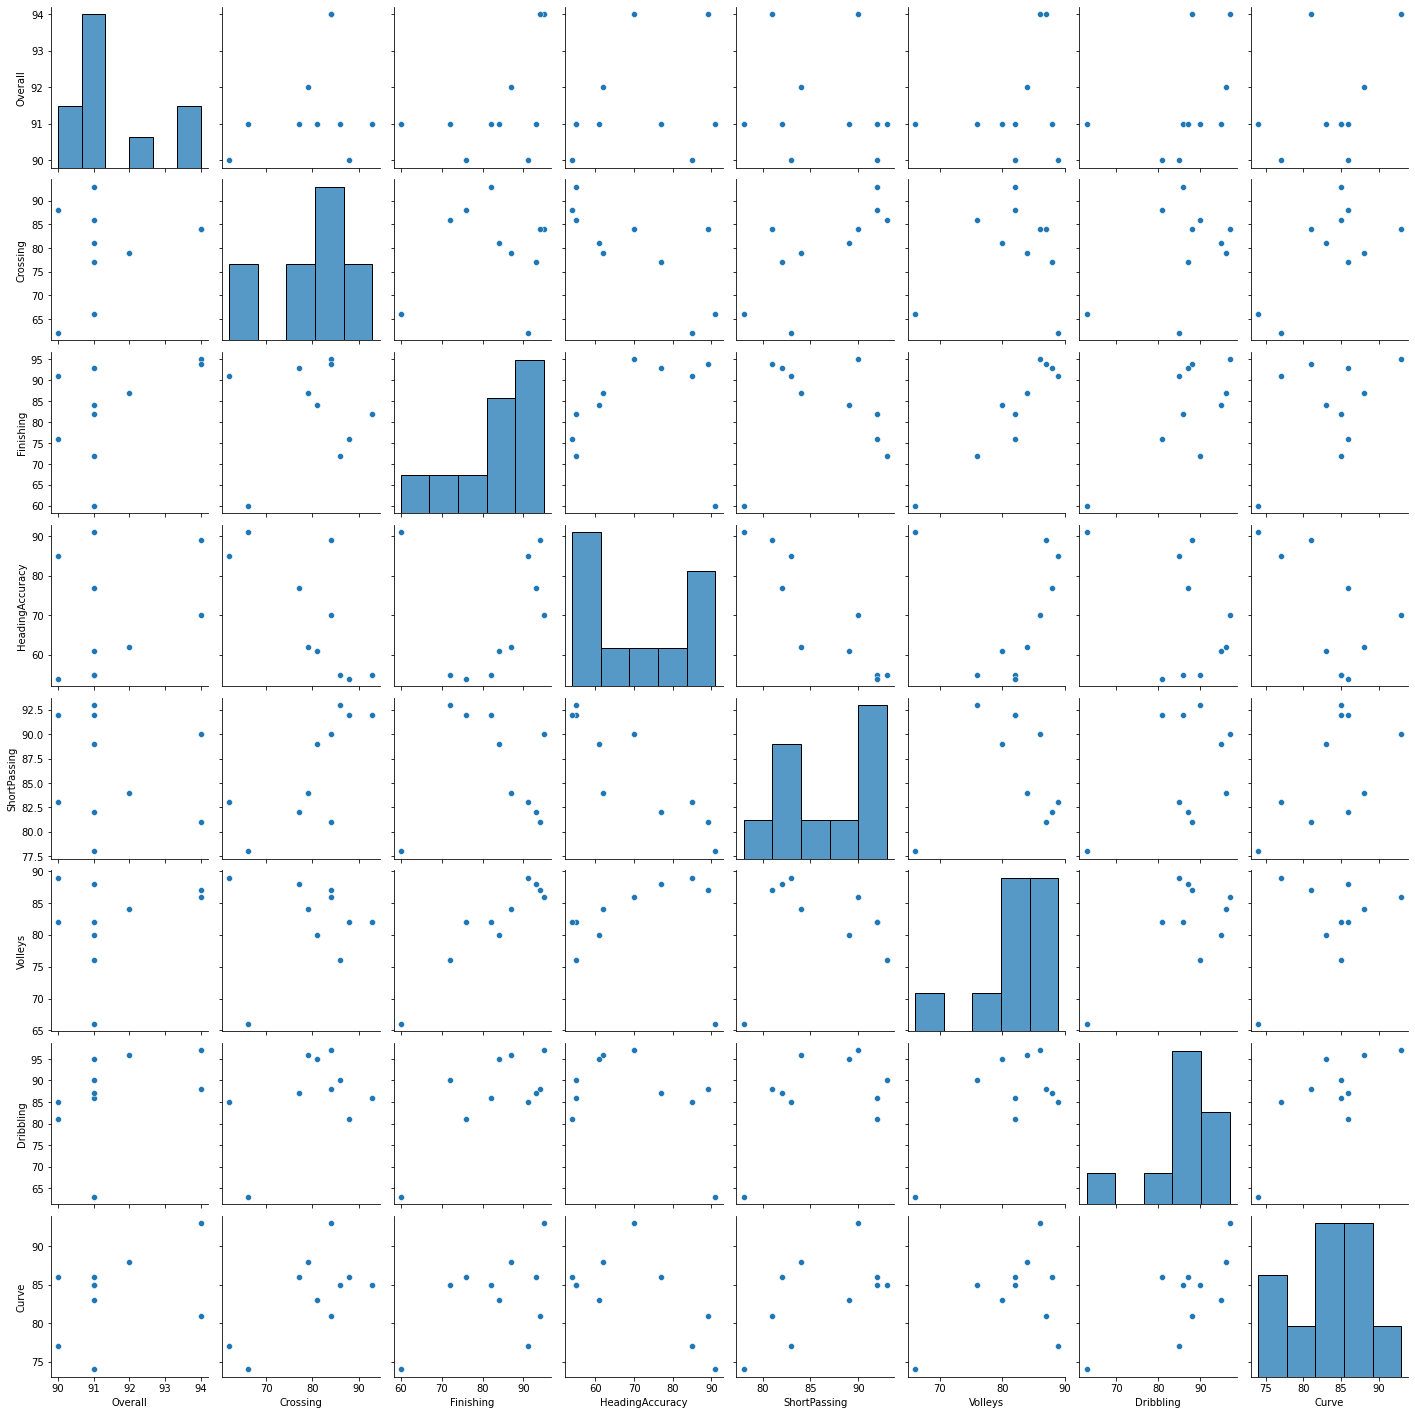

In [ ]:
# answer goes here
df = soccer_data[['Overall',	'Crossing',	'Finishing',	'HeadingAccuracy',	'ShortPassing',	'Volleys',	'Dribbling',
                              'Curve']].head(10)
sns.pairplot(df)




For the Chicago traffic crash data, we will consider the "DAMAGE" column to be the response of interest, and the other columns to be potential features. Most of the features are categorical, so we can use contingency table to identify potentially strong associations between categorical features and our categorical response.

Select one or two categorical variables that you suspect will have a strong relationship with the dollar amount of damages associated with a crash (we will choose TRAFFICWAY_TYPE), and print out the associated contigency table in two different forms:

- Raw data counts
- Percentage of total (i.e. the percentage of "OVER \$1500" for each level of a categorical variable)

Are there any particular categories within a particular feature that are strongly associated with higher damages? Are there any caveats to keep in mind with some of the more extreme values in the contingency table?

In [ ]:
# answer goes here
data_crosstab = pd.crosstab(crash_data['TRAFFICWAY_TYPE'], 
                            crash_data['WEATHER_CONDITION'],  
                               margins = False)
data_crosstab

WEATHER_CONDITION,BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN
TRAFFICWAY_TYPE,,,,,,,,,,,
ALLEY,0,4570,225,5,3,24,442,3,7,302,312
CENTER TURN LANE,0,2591,117,10,3,19,384,1,9,126,113
DIVIDED - W/MEDIAN (NOT RAISED),1,54868,2333,137,32,204,7035,17,126,2335,1808
DIVIDED - W/MEDIAN BARRIER,2,17946,799,68,13,101,2696,7,48,765,446
DRIVEWAY,0,1046,41,8,0,3,88,2,2,52,57
"FIVE POINT, OR MORE",0,117,12,0,0,1,18,0,1,4,5
FOUR WAY,2,4633,210,9,15,22,730,0,4,97,98
L-INTERSECTION,0,19,0,0,0,0,2,0,0,1,0
NOT DIVIDED,8,134818,5039,298,71,437,16369,27,271,5982,6034


In [ ]:
from __future__ import division
df = pd.DataFrame(crash_data[(crash_data['DAMAGE'] == 'OVER $1,500')])
df_cross = pd.crosstab(df['TRAFFICWAY_TYPE'], df['WEATHER_CONDITION'], normalize='index')

In [ ]:
df_cross

WEATHER_CONDITION,BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN
TRAFFICWAY_TYPE,,,,,,,,,,,
ALLEY,0.000000,0.765142,0.033505,0.000322,0.000966,0.003866,0.076353,0.000966,0.001289,0.050902,0.066688
CENTER TURN LANE,0.000000,0.764508,0.030216,0.002878,0.000959,0.006235,0.117986,0.000480,0.003837,0.043165,0.029736
DIVIDED - W/MEDIAN (NOT RAISED),0.000000,0.787302,0.035271,0.002175,0.000525,0.003250,0.107137,0.000325,0.002050,0.036695,0.025272
DIVIDED - W/MEDIAN BARRIER,0.000138,0.773085,0.035319,0.003249,0.000691,0.004838,0.126555,0.000415,0.002419,0.035941,0.017349
DRIVEWAY,0.000000,0.805195,0.030844,0.006494,0.000000,0.000000,0.058442,0.000000,0.001623,0.047078,0.050325
"FIVE POINT, OR MORE",0.000000,0.714286,0.076190,0.000000,0.000000,0.009524,0.104762,0.000000,0.009524,0.038095,0.047619
FOUR WAY,0.000500,0.793500,0.036750,0.001500,0.002750,0.004250,0.126500,0.000000,0.000750,0.015750,0.017750
L-INTERSECTION,0.000000,0.875000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000
NOT DIVIDED,0.000053,0.784938,0.031398,0.001878,0.000454,0.003112,0.102066,0.000158,0.001720,0.037729,0.036494
